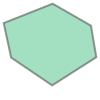

In [18]:
import json
import shapely
from shapely.geometry import shape

poly_geojson = """{
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "type": "Polygon",
        "coordinates": [
          [
            [
              146.744384765625,
              -35.101934057246055
            ],
            [
              147.59033203125,
              -35.675147436084664
            ],
            [
              148.502197265625,
              -35.09294531373263
            ],
            [
              148.392333984375,
              -34.44315867450577
            ],
            [
              147.601318359375,
              -33.988918483762156
            ],
            [
              146.590576171875,
              -34.38877925439018
            ],
            [
              146.744384765625,
              -35.101934057246055
            ]
          ]
        ]
      }
    }
  ]
}"""


a = shape(json.loads(poly_geojson)['features'][0]['geometry'])

a

In [83]:
from functools import partial

from shapely.geometry import Polygon
from shapely.ops import transform
import pyproj


print(a.area)
proj = partial(pyproj.transform, pyproj.Proj("+proj=latlon"), pyproj.Proj('epsg:3577'))

with open('./majorincidents.json', 'r') as f:
  data = json.load(f)
  for feat in data['features']:
    shp = shape(feat['geometry'])
    #print(shp[0])
    
    print(shp.area)
    print("AAA", transform(proj, shp).area)
    

0.3061920261695354
0.0020832016976007734
AAA 20613852.656983823
0.006458283894188067
AAA 63995199.7489893
0.023941001146195646
AAA 240677161.62069535
9.639894040502548e-06
AAA 98903.21222039664
0.09834876596824386
AAA 984822420.8392829
0.0
AAA 0.0
0.3061920261695354
AAA 3054853311.1850786
0.0
AAA 0.0
0.0
AAA 0.0
0.0011896580930804194
AAA 11729016.961052364
0.17530155287800397
AAA 1727150811.292728
0.0
AAA 0.0
0.0
AAA 0.0
2.9781232604710448e-06
AAA 31123.796808624385
0.00046853564927001596
AAA 4807041.150293065
0.06317906241728023
AAA 637124365.149697
0.0
AAA 0.0
0.0980738671607774
AAA 984670116.6750484
0.31998286240569873
AAA 3234472958.3284993
0.33347180316568503
AAA 3350099989.3526945
0.0
AAA 0.0
0.01786051261141333
AAA 183299226.8176685
0.0
AAA 0.0
0.0026496428131039793
AAA 26849515.53044499
0.04109659136453232
AAA 410799274.9808462
0.4976004322928169
AAA 5145702695.644647
0.21377320448135723
AAA 2134943592.196375
0.2776514837955244
AAA 2841814633.222149
0.019610386779950854
AAA 201

In [79]:
from shapely.geometry import Point
point = Point(-36.0, 149.0)
print("AAA", transform(proj, point))
point.x

AAA POINT (1528263.284135562 -4035058.845733899)


-36.0

In [50]:
from functools import partial

from shapely.geometry import Polygon
from shapely.ops import transform
import pyproj


print(a.area)
proj = partial(pyproj.transform, pyproj.Proj('epsg:4326'), pyproj.Proj('epsg:3577'))
transform(proj, a[1][1])

0.3061920261695354


ValueError: not enough values to unpack (expected 4, got 0)

In [3]:
from ipyleaflet import Map, GeoJSON
import json
import os
import requests

"""

if not os.path.exists('europe_110.geo.json'):
  url = 'https://github.com/jupyter-widgets/ipyleaflet/raw/master/examples/europe_110.geo.json'
  r = requests.get(url)
  with open('europe_110.geo.json', 'w') as f:
    f.write(r.content.decode("utf-8"))
"""


with open('./majorincidents.json', 'r') as f:
  data = json.load(f)

m = Map(center=(-33, 150), zoom=3)
geo_json = GeoJSON(data=data, style = {'color': 'green', 'opacity':1, 'weight':1.9, 'dashArray':'9', 'fillOpacity':0.1})
m.add_layer(geo_json)
m

Map(center=[-33, 150], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [4]:
data

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'GeometryCollection',
    'geometries': [{'type': 'Point',
      'coordinates': [149.47430664400008, -36.865390300999934]},
     {'type': 'GeometryCollection',
      'geometries': [{'type': 'Polygon',
        'coordinates': [[[149.508349875, -36.838481488],
          [149.507537649, -36.838653307],
          [149.506976011, -36.837659775],
          [149.507477063, -36.8367984929999],
          [149.508473988, -36.836390765],
          [149.509341841, -36.8364497759999],
          [149.510069263, -36.8366277549999],
          [149.51052341, -36.8372755249999],
          [149.510391824, -36.837664989],
          [149.509818722, -36.837793104],
          [149.508349875, -36.838481488]]]},
       {'type': 'Polygon',
        'coordinates': [[[149.51022125, -36.8324483379999],
          [149.509600114, -36.8325774639999],
          [149.509354705, -36.8324279719999],
          [149.509768399, -36.8318392